In [21]:
from regressor_models import (
    DumbRegressor,
    LinearRegressor,
    RFRegressor,
)

In [37]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

In [11]:
df = pd.read_parquet("./data/dataset_complete.parquet")

Evaluation

In [12]:
train = df[df["year"] < 2019]
test  = df[df["year"] == 2019]

y_train = train["score"]
y_test  = test["score"]

# Drop non-features
drop_cols = ["country", "year", "score"]
X_train = train.drop(columns=drop_cols)
X_test  = test.drop(columns=drop_cols)

In [18]:
def evaluate_regressor(model, X_train, y_train, X_test, y_test, name="Model"):
    print(f"\n======= Evaluating {name} =======")
    
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, preds)

    print(f"MAE : {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²  : {r2:.4f}")

    return {"MAE": mae, "RMSE": rmse, "R2": r2}

In [23]:
models = {
    "Linear Regression": LinearRegressor(),
    "Dumb Income Regressor": DumbRegressor(),
    "Random Forest": RFRegressor(),
}

results = {}

for name, model in models.items():
    results[name] = evaluate_regressor(
        model,
        X_train,
        y_train,
        X_test,
        y_test,
        name=name
    )



======= Evaluating Linear Regression =======
MAE : 0.9185
RMSE: 2.4843
R²  : -3.7699

======= Evaluating Dumb Income Regressor =======
MAE : 1.0457
RMSE: 1.3103
R²  : -0.3268

======= Evaluating Random Forest =======
MAE : 0.2197
RMSE: 0.2917
R²  : 0.9342


Visualizations

In [26]:
rf_model = models["Random Forest"].model

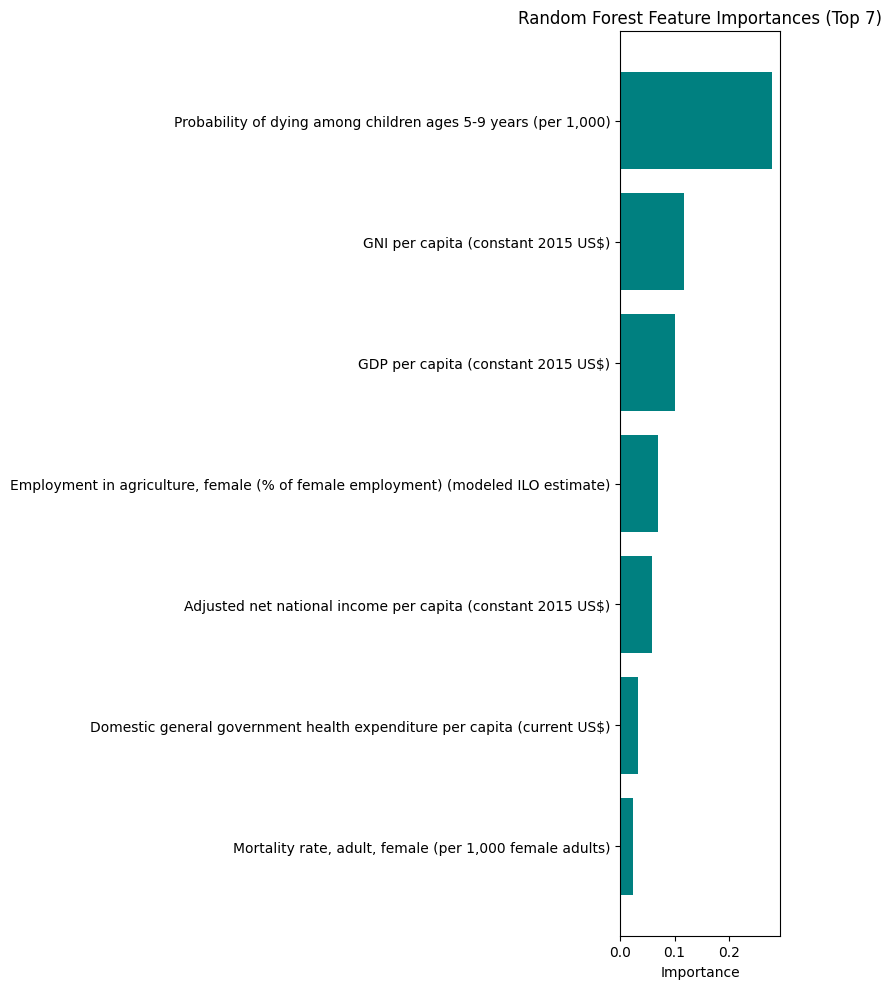

In [39]:
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Sort top N
N = 7
idx = np.argsort(importances)[-N:]
top_features = feature_names[idx]
top_importances = importances[idx]

plt.figure(figsize=(8, 10))
plt.barh(top_features, top_importances, color="teal")
plt.title("Random Forest Feature Importances (Top 7)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

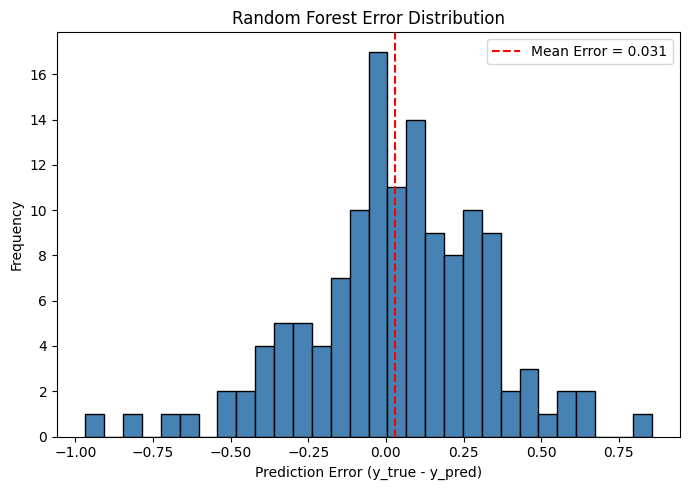

In [43]:
preds = rf_model.predict(X_test)

errors = y_test - preds
plt.figure(figsize=(7,5))
plt.hist(errors, bins=30, color="steelblue", edgecolor="black")
plt.axvline(errors.mean(), color='red', linestyle='--', label=f"Mean Error = {errors.mean():.3f}")
plt.title("Random Forest Error Distribution")
plt.xlabel("Prediction Error (y_true - y_pred)")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

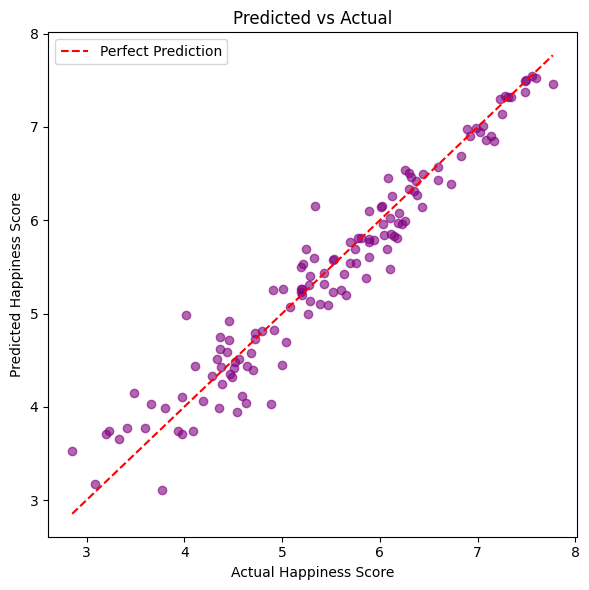

In [44]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, preds, alpha=0.6, color="purple")
plt.plot([y_test.min(), y_test.max()],
            [y_test.min(), y_test.max()],
            "r--", label="Perfect Prediction")
plt.xlabel("Actual Happiness Score")
plt.ylabel("Predicted Happiness Score")
plt.legend()
plt.title("Predicted vs Actual")
plt.tight_layout()
plt.show()

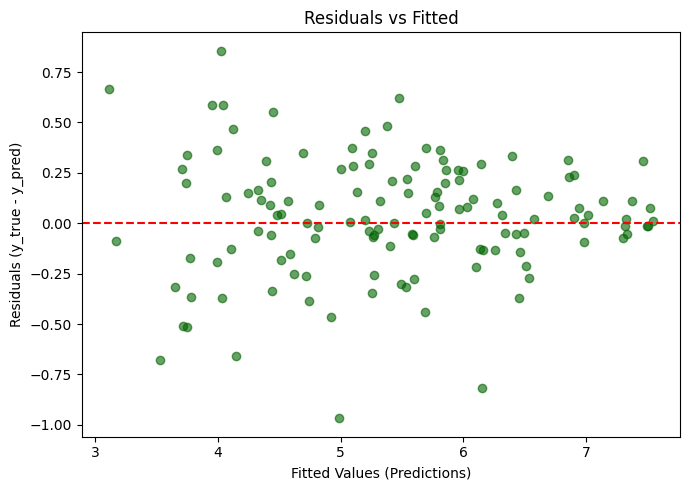

In [45]:
residuals = y_test - preds

plt.figure(figsize=(7,5))
plt.scatter(preds, residuals, alpha=0.6, color="darkgreen")
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values (Predictions)")
plt.ylabel("Residuals (y_true - y_pred)")
plt.title("Residuals vs Fitted")
plt.tight_layout()
plt.show()